<a href="https://colab.research.google.com/github/duketran1996/NYC-Crime/blob/main/nyc_crime_datastudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
pip install openclean-core

In [36]:
pip install openclean-notebook

In [37]:
import sys
import re
import numpy as np

from csv import reader
from datetime import *
import seaborn as sns
import gzip
import folium
from folium.plugins import HeatMap
from random import sample 
import pandas as pd # data processing and manipulation
import plotly.express as px
import matplotlib.pyplot as plt
import pprint
import os, re


pp = pprint.PrettyPrinter(indent=2)

In [41]:
import gzip
import os

from openclean.data.source.socrata import Socrata

datafile = './uip8-fykc.tsv.gz'

# Download file only if it does not exist already.
if not os.path.isfile(datafile):
    with gzip.open(datafile, 'wb') as f:
        ds = Socrata().dataset('uip8-fykc')
        print('Downloading ...\n')
        print(ds.name + '\n')
        print(ds.description)
        ds.write(f)

In [42]:
from openclean.pipeline import stream

ds = stream(datafile)

df = ds.to_df()

In [ ]:
df.describe()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
count,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413,140413
unique,140413,366,251,237,66,62,952,5,5,77,24,5,2,7,25422,27076,31207,31208,31208
top,208860473,06/01/2020,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,40,0,25-44,M,BLACK,1017119,183909,40.67141166300007,-73.88151172399995,POINT (-73.88151172399995 40.67141166300007)
freq,1,783,17580,17580,23731,23731,17123,73015,38258,4379,128721,77393,116933,69205,1176,1175,1174,1174,1174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



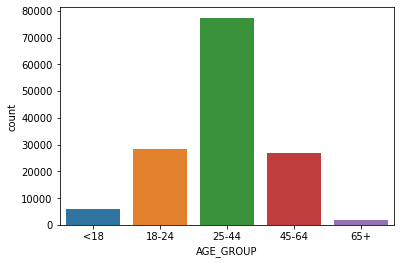

In [ ]:
def order_labels(age_group_labels):
#     """Returns age_group label sorted in ascending order"""
    ordered_labels = sorted(list(age_group_labels))
    last_item = ordered_labels.pop()
    ordered_labels.insert(0, last_item)
    return ordered_labels
    
age_group_labels = order_labels(df.AGE_GROUP.unique())

sns.countplot(df['AGE_GROUP'], order=age_group_labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



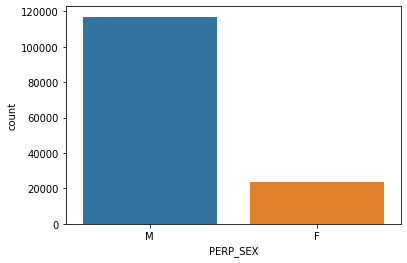

In [ ]:
#gender
sns.countplot(df['PERP_SEX'], )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



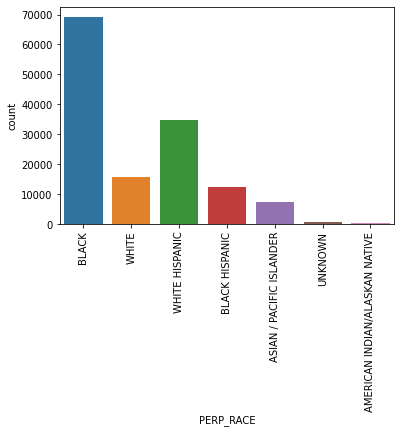

In [ ]:
#Race
plot_race = sns.countplot(df['PERP_RACE'], )
tick_labels = plot_race.get_xticklabels()
plot_race = plot_race.set_xticklabels(tick_labels, rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



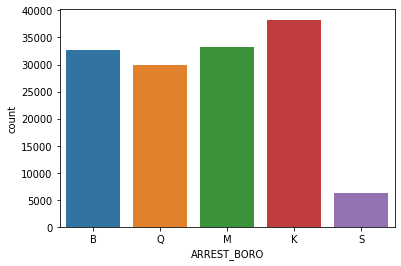

In [ ]:
sns.countplot(df['ARREST_BORO'], )

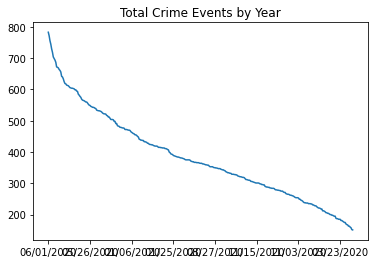

In [ ]:
df['ARREST_DATE'].value_counts().plot(kind="line", title = "Total Crime Events by Year")